In [963]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [964]:
Prostate_canser =pd.read_csv("D:\Sho4l\AI robotics\Task2\Prostate_Cancer.csv")## Reading csv file and convert to data frame
Prostate_canser

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [965]:
Prostate_canser.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [966]:
Prostate_canser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [967]:
Prostate_canser.isna().sum() # calculates the total number of missing values in a DataFrame

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [968]:
# Function to get the outliers of the given data using Z score.
def zScoreOutliers(data,threshold):
    outliers = []

    # Set the threshold which we will use
    threshold = threshold
    mean = np.mean(data)
    std = np.std(data)

    # Calculate the Z score using this formula
    z_score= (data - mean)/std

    # Search for the outliers
    for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [969]:
def iqrOutliers(data):
    outliers2 = []
    sorted_list = sorted(data)
    quantile1, quantile3 = np.percentile(sorted_list, [25,75])
    iqr_value = quantile3-quantile1
    lower_bound_val = quantile1 - (1.5 * iqr_value) 
    upper_bound_val = quantile3 + (1.5 * iqr_value)

    for i in data:
        if i < lower_bound_val or i > upper_bound_val:
            outliers2.append(i)          
    return outliers2

In [970]:
outliers_z = zScoreOutliers(Prostate_canser["radius"],3)
outliers_iqr = iqrOutliers(Prostate_canser['radius'])
print(outliers_z)
print(outliers_iqr)

[]
[]


In [971]:
outliers_z = zScoreOutliers(Prostate_canser["texture"],3)
outliers_iqr = iqrOutliers(Prostate_canser['texture'])
print(outliers_z)
print(outliers_iqr)

[]
[]


In [972]:
outliers_z = zScoreOutliers(Prostate_canser["perimeter"],3)
outliers_iqr = iqrOutliers(Prostate_canser['perimeter'])
print(outliers_z)
print(outliers_iqr)

[172]
[172]


In [973]:
outliers_z = zScoreOutliers(Prostate_canser["area"],3)
outliers_iqr = iqrOutliers(Prostate_canser['area'])
print(outliers_z)
print(outliers_iqr)

[1878]
[1878]


In [974]:
outliers_z = zScoreOutliers(Prostate_canser["smoothness"],2)
outliers_iqr = iqrOutliers(Prostate_canser['smoothness'])
print(outliers_z)
print(outliers_iqr)

[0.143, 0.143, 0.07, 0.141]
[0.143, 0.143, 0.141]


In [975]:
outliers_z = zScoreOutliers(Prostate_canser["compactness"],2)
outliers_iqr = iqrOutliers(Prostate_canser['compactness'])
print(outliers_z)
print(outliers_iqr)

[0.278, 0.284, 0.345, 0.267]
[0.278, 0.284, 0.345]


In [976]:
outliers_z = zScoreOutliers(Prostate_canser["symmetry"],3)
outliers_iqr = iqrOutliers(Prostate_canser['symmetry'])
print(outliers_z)
print(outliers_iqr)

[0.304, 0.291]
[0.304, 0.274, 0.291]


In [977]:
outliers_z = zScoreOutliers(Prostate_canser["fractal_dimension"],3)
outliers_iqr = iqrOutliers(Prostate_canser['fractal_dimension'])
print(outliers_z)
print(outliers_iqr)

[0.097, 0.09]
[0.097, 0.09]


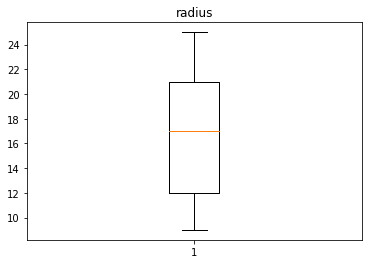

In [978]:
plt.boxplot(Prostate_canser['radius'])
plt.title("radius")
plt.show()

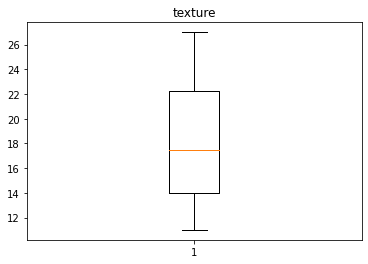

In [979]:
plt.boxplot(Prostate_canser['texture'])
plt.title("texture")
plt.show()

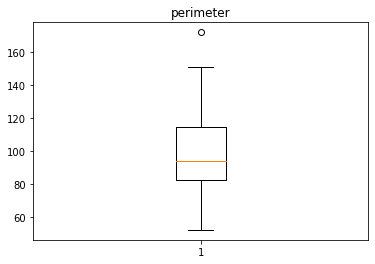

In [980]:
plt.boxplot(Prostate_canser['perimeter'])
plt.title("perimeter")
plt.show()

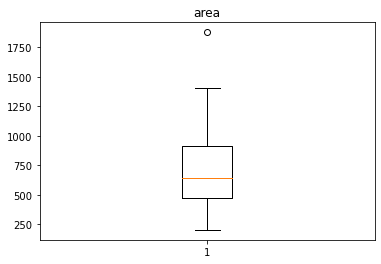

In [981]:
plt.boxplot(Prostate_canser['area'])
plt.title("area")
plt.show()

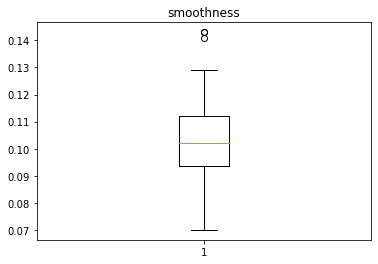

In [982]:
plt.boxplot(Prostate_canser['smoothness'])
plt.title("smoothness")
plt.show()

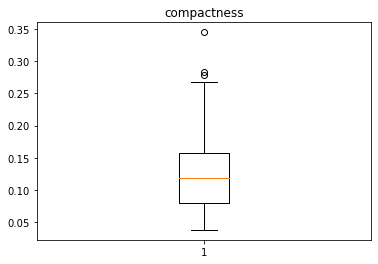

In [983]:
plt.boxplot(Prostate_canser['compactness'])
plt.title("compactness")
plt.show()

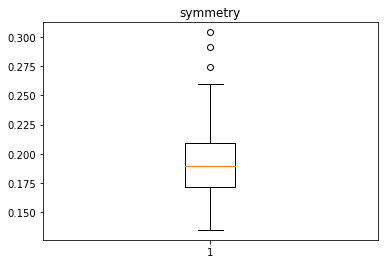

In [984]:
plt.boxplot(Prostate_canser['symmetry'])
plt.title("symmetry")
plt.show()

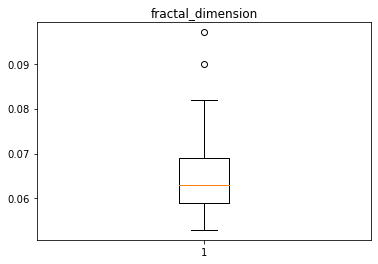

In [985]:
plt.boxplot(Prostate_canser['fractal_dimension'])
plt.title("fractal_dimension")
plt.show()

In [986]:
x_train = Prostate_canser.drop("diagnosis_result",axis=1)
x_train.drop(x_train.tail(1).index,inplace = True)
x_train=x_train.values        

print(x_train)
# len(x_train)

[[1.000e+00 2.300e+01 1.200e+01 1.510e+02 9.540e+02 1.430e-01 2.780e-01
  2.420e-01 7.900e-02]
 [2.000e+00 9.000e+00 1.300e+01 1.330e+02 1.326e+03 1.430e-01 7.900e-02
  1.810e-01 5.700e-02]
 [3.000e+00 2.100e+01 2.700e+01 1.300e+02 1.203e+03 1.250e-01 1.600e-01
  2.070e-01 6.000e-02]
 [4.000e+00 1.400e+01 1.600e+01 7.800e+01 3.860e+02 7.000e-02 2.840e-01
  2.600e-01 9.700e-02]
 [5.000e+00 9.000e+00 1.900e+01 1.350e+02 1.297e+03 1.410e-01 1.330e-01
  1.810e-01 5.900e-02]
 [6.000e+00 2.500e+01 2.500e+01 8.300e+01 4.770e+02 1.280e-01 1.700e-01
  2.090e-01 7.600e-02]
 [7.000e+00 1.600e+01 2.600e+01 1.200e+02 1.040e+03 9.500e-02 1.090e-01
  1.790e-01 5.700e-02]
 [8.000e+00 1.500e+01 1.800e+01 9.000e+01 5.780e+02 1.190e-01 1.650e-01
  2.200e-01 7.500e-02]
 [9.000e+00 1.900e+01 2.400e+01 8.800e+01 5.200e+02 1.270e-01 1.930e-01
  2.350e-01 7.400e-02]
 [1.000e+01 2.500e+01 1.100e+01 8.400e+01 4.760e+02 1.190e-01 2.400e-01
  2.030e-01 8.200e-02]
 [1.100e+01 2.400e+01 2.100e+01 1.030e+02 7.980e+0

In [987]:

y_train =Prostate_canser["diagnosis_result"] # to make lables without inputs in array
y_train = y_train.map({'M':0 , 'B':1})
y_train.drop(y_train.tail(1).index,inplace = True)
y_train = y_train.values

        
y= y_train.reshape(len(y_train),1)
print(y)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [988]:
def distance_ecq(x_traain,x_test_point):
    distances=[]
    for row in range(len(x_traain)) : #loop over rows in x_train
        current_train_piont = x_traain[row]
        # print(current_train_piont.shape)
        current_distance = 0    #initalize distance zero
        # for eacr_row
        for column in range(len(current_train_piont)): # loop over columns(feature) in each row of x_train
            current_distance += (current_train_piont[column]-x_test_point[column])**2
        # current_distance = np.subtract(current_train_piont,x_test_point)
        # acummalation = np.sum(np.square(current_distance)) 
        current_distance=np.sqrt(current_distance)
        # print(x_test_point.shape)
        distances.append(current_distance)
    # distances = pd.DataFrame(data=distances, columns=["dist"])
    return distances 

In [989]:
def nearest_neighbour(distance_point,k):
    # distance point: distance between test point and each ponit in tranining 
    # k : number of neighbours to consider for prediction
    nearest_neighbors_indices = np.argsort(distance_point)[:k]  ##index prediction
    # print(nearest_neighbors_indices)        
    return nearest_neighbors_indices
    

In [990]:
def voting (df_nearst , y_traain):
    nearest_neighbors_classes = y_traain[df_nearst]         ## prediction of index from past function
    X_flattened = nearest_neighbors_classes.flatten() ## convert from 2 dimension to 1 dimension
    # print(nearest_neighbors_classes)
    # print(X_flattened)
    prediction = np.argmax(np.bincount(X_flattened))  ## ygeeb aktr 7aga etkrrt
    # print(prediction)
    return prediction

In [991]:
x_test = Prostate_canser.tail(1).drop("diagnosis_result",axis=1).values #choose data to using in test
x_test.shape

(1, 9)

In [992]:
def predict(predict_num):
    predict_string = []
    for i in predict_num:
        if i == 1:
            predict_string.append("B")
        else:
            predict_string.append("M")
    return predict_string

In [993]:
def knn_from_scratch(x_train , y_train ,x_test , k):
    y_pred = []
    for x_test_point in x_test:
        distance_point = distance_ecq(x_train,x_test_point)
        df_nearst_point = nearest_neighbour(distance_point, k)
        y_pred_point = voting(df_nearst_point,y_train)
        y_pred.append(y_pred_point)
        predict_string = predict(y_pred)

    return predict_string

In [994]:
print(x_train.shape)
print(y.shape)
print(x_test.shape)
k=3 
y_pred_scratch = knn_from_scratch(x_train,y,x_test,k)
y_pred_scratch


(99, 9)
(99, 1)
(1, 9)


['B']

In [995]:
x = [1,2,3,4]
q = [5,6,7,8]
r =np.subtract(x,q)
suma =np.sum(np.square(r)) 
suma

64